In [1]:
import os
import cv2
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input

from keras.utils import to_categorical

In [3]:
from mtcnn.mtcnn import MTCNN

def detect_face(img):
    # Convert BGR to RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Create MTCNN detector
    detector = MTCNN()
    
    # Detect faces
    results = detector.detect_faces(img_rgb)
    
    # Check if a face is detected
    if results:
        # Get the first face (assuming there is only one)
        x, y, w, h = results[0]['box']
        
        # Crop the face region
        cropped_face = img[y:y+h, x:x+w]
        
        # Convert to grayscale and resize
        cropped_face = cv2.cvtColor(cropped_face, cv2.COLOR_BGR2GRAY)
        cropped_face = cv2.resize(cropped_face, (50, 50))
        
        return cropped_face
    else:
        # Return None if no face is detected
        return None


In [4]:
def print_progress(val, val_len, folder, bar_size=20):
    progr = "#"*round((val)*bar_size/val_len) + " "*round((val_len - (val))*bar_size/val_len)
    if val == 0:
        print("", end = "\n")
    else:
        print("[%s] (%d samples)\t label : %s \t\t" % (progr, val+1, folder), end="\r")

In [5]:
dataset_folder = "data/"

names = []
images = []
for folder in os.listdir(dataset_folder):
    files = os.listdir(os.path.join(dataset_folder, folder))[:150]
    if len(files) < 50 :
        continue
    for i, name in enumerate(files): 
        if name.find(".jpg") > -1 :
            img = cv2.imread(os.path.join(dataset_folder + folder, name))
            img = detect_face(img) # detect face using mtcnn and crop to 100x100
            if img is not None :
                images.append(img)
                names.append(folder)

                print_progress(i, len(files), folder)

1/1 [==============================] - 0s 228ms/step

1/1 [==============================] - 0s 183ms/step

1/1 [==============================] - 0s 309ms/step


In [6]:
print("number of samples :", len(names))

number of samples : 111


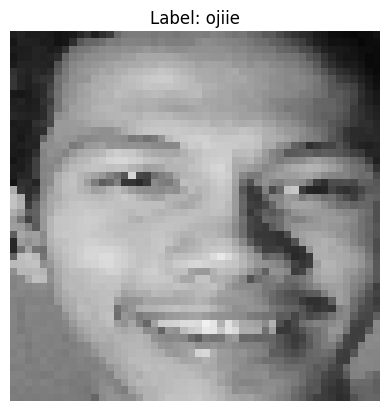

In [41]:
import matplotlib.pyplot as plt

# Indeks gambar yang ingin diplot
index_to_plot = 69

# Memplot gambar
plt.imshow(cv2.cvtColor(images[index_to_plot], cv2.COLOR_BGR2RGB))
plt.title(f"Label: {names[index_to_plot]}")
plt.axis('off')  # Tidak menampilkan sumbu
plt.show()


In [7]:
def img_augmentation(img):
    h, w = img.shape
    center = (w // 2, h // 2)
    M_rot_5 = cv2.getRotationMatrix2D(center, 5, 1.0)
    M_rot_neg_5 = cv2.getRotationMatrix2D(center, -5, 1.0)
    M_rot_10 = cv2.getRotationMatrix2D(center, 10, 1.0)
    M_rot_neg_10 = cv2.getRotationMatrix2D(center, -10, 1.0)
    M_trans_3 = np.float32([[1, 0, 3], [0, 1, 0]])
    M_trans_neg_3 = np.float32([[1, 0, -3], [0, 1, 0]])
    M_trans_6 = np.float32([[1, 0, 6], [0, 1, 0]])
    M_trans_neg_6 = np.float32([[1, 0, -6], [0, 1, 0]])
    M_trans_y3 = np.float32([[1, 0, 0], [0, 1, 3]])
    M_trans_neg_y3 = np.float32([[1, 0, 0], [0, 1, -3]])
    M_trans_y6 = np.float32([[1, 0, 0], [0, 1, 6]])
    M_trans_neg_y6 = np.float32([[1, 0, 0], [0, 1, -6]])
    
    imgs = []
    imgs.append(cv2.warpAffine(img, M_rot_5, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_rot_neg_5, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_rot_10, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_rot_neg_10, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_3, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_neg_3, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_6, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_neg_6, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_y3, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_neg_y3, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_y6, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.warpAffine(img, M_trans_neg_y6, (w, h), borderValue=(255,255,255)))
    imgs.append(cv2.add(img, 10))
    imgs.append(cv2.add(img, 30))
    imgs.append(cv2.add(img, -10))
    imgs.append(cv2.add(img, -30)) 
    imgs.append(cv2.add(img, 15))
    imgs.append(cv2.add(img, 45))
    imgs.append(cv2.add(img, -15))
    imgs.append(cv2.add(img, -45))
    
    return imgs

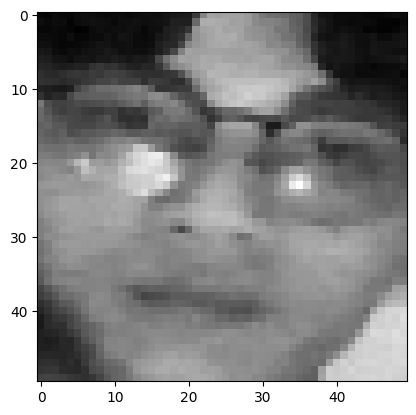

In [8]:
plt.imshow(images[0], cmap="gray")

In [9]:
augmented_images = []
augmented_names = []
for i, img in enumerate(images):
    try :
        augmented_images.extend(img_augmentation(img))
        augmented_names.extend([names[i]] * 20)
    except :
        print(i)

In [10]:
len(augmented_images), len(augmented_names)

(2220, 2220)

In [11]:
images.extend(augmented_images)
names.extend(augmented_names)

In [12]:
len(images), len(names)

(2331, 2331)

In [13]:
unique, counts = np.unique(names, return_counts = True)

for item in zip(unique, counts):
    print(item)

('ilhan', 1071)
('ojiie', 1260)


In [14]:
n = 1000

def randc(labels, l):
    return np.random.choice(np.where(np.array(labels) == l)[0], n, replace=False)

mask = np.hstack([randc(names, l) for l in np.unique(names)])

In [15]:
names = [names[m] for m in mask]
images = [images[m] for m in mask]

In [16]:
le = LabelEncoder()

le.fit(names)

labels = le.classes_

name_vec = le.transform(names)

categorical_name_vec = to_categorical(name_vec)

In [17]:
print("number of class :", len(labels))
print(labels)

number of class : 2
['ilhan' 'ojiie']


In [18]:
x_train, x_test, y_train, y_test = train_test_split(np.array(images, dtype=np.float32),   
                                                    np.array(categorical_name_vec),        
                                                    test_size=0.15, 
                                                    random_state=42)

In [19]:
print(x_train.shape, y_train.shape, x_test.shape,  y_test.shape)

(1700, 50, 50) (1700, 2) (300, 50, 50) (300, 2)


In [20]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

In [21]:
x_train.shape, x_test.shape

((1700, 50, 50, 1), (300, 50, 50, 1))

In [22]:
import tensorflow as tf

In [23]:
input_shape = x_train[0].shape

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=input_shape, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(labels), activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1344 (Conv2D)        (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_672 (MaxPool  (None, 24, 24, 32)        0         
 ing2D)                                                          
                                                                 
 conv2d_1345 (Conv2D)        (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_673 (MaxPool  (None, 11, 11, 64)        0         
 ing2D)                                                          
                                                                 
 conv2d_1346 (Conv2D)        (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_674 (MaxPool  (None, 4, 4, 128)         0

In [64]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [65]:
EPOCHS = 10
BATCH_SIZE = 32

history = model.fit(x_train, y_train, 
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    shuffle=True, validation_split=0.15)

Epoch 1/10
46/46 [==============================] - 8s 115ms/step - loss: 0.9271 - accuracy: 0.8644 - val_loss: 0.0415 - val_accuracy: 0.9843
Epoch 2/10
46/46 [==============================] - 5s 105ms/step - loss: 0.0221 - accuracy: 0.9945 - val_loss: 0.0502 - val_accuracy: 0.9804
Epoch 3/10
46/46 [==============================] - 5s 101ms/step - loss: 0.0206 - accuracy: 0.9910 - val_loss: 0.0177 - val_accuracy: 0.9922
Epoch 4/10
46/46 [==============================] - 5s 102ms/step - loss: 0.0097 - accuracy: 0.9979 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 5/10
46/46 [==============================] - 5s 103ms/step - loss: 0.0032 - accuracy: 0.9986 - val_loss: 6.6347e-04 - val_accuracy: 1.0000
Epoch 6/10
46/46 [==============================] - 5s 105ms/step - loss: 4.4932e-04 - accuracy: 1.0000 - val_loss: 6.7579e-04 - val_accuracy: 1.0000
Epoch 7/10
46/46 [==============================] - 5s 103ms/step - loss: 2.7498e-04 - accuracy: 1.0000 - val_loss: 3.8909e-04 - val_acc

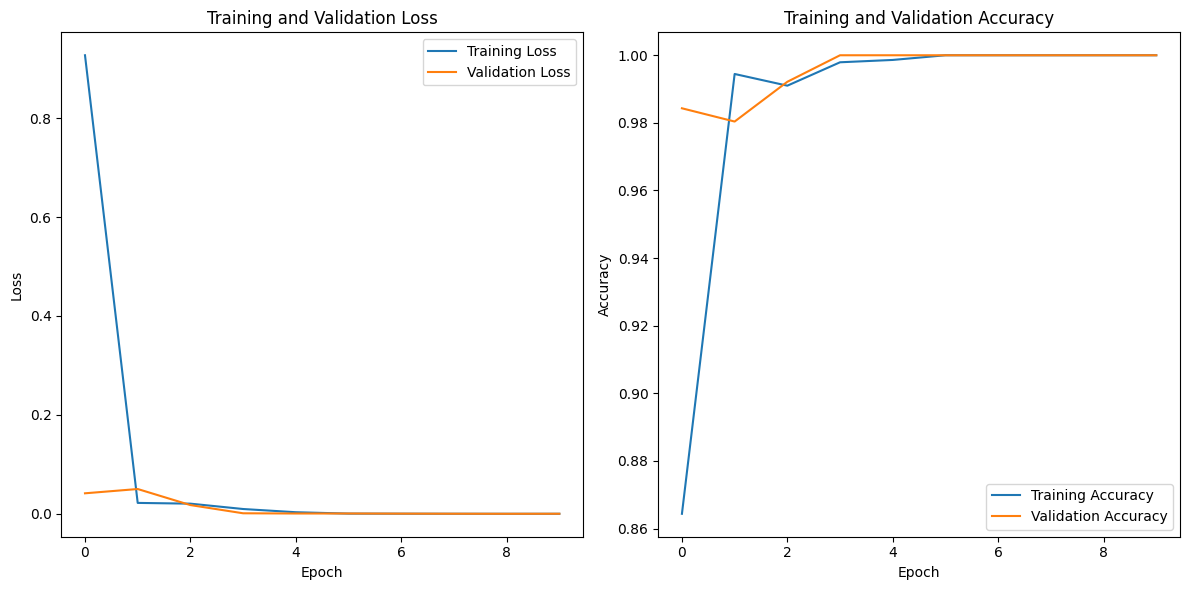

In [67]:
import matplotlib.pyplot as plt

# Assuming you have a Keras model called 'model' and it has been trained using the 'fit' method
# For example: history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Plot training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(model.history.history['accuracy'], label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [68]:
model.save("facerecognition.h5")

c:\users\crozi\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [69]:
y_pred=model.predict(x_test)

10/10 [==============================] - 1s 29ms/step


In [25]:
from keras.models import load_model

In [26]:
model = load_model("facerecognition.h5")

In [27]:
def draw_ped(img, label, x0, y0, xt, yt, color=(255,127,0), text_color=(255,255,255)):

    (w, h), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
    cv2.rectangle(img,
                  (x0, y0 + baseline),  
                  (max(xt, x0 + w), yt), 
                  color, 
                  2)
    cv2.rectangle(img,
                  (x0, y0 - h),  
                  (x0 + w, y0 + baseline), 
                  color, 
                  -1)  
    cv2.putText(img, 
                label, 
                (x0, y0),                   
                cv2.FONT_HERSHEY_SIMPLEX,     
                0.5,                          
                text_color,                
                1,
                cv2.LINE_AA) 
    return img

In [28]:
import cv2
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# --------- load Keras CNN model -------------
model = load_model("facerecognition.h5")
print("[INFO] finish load model...")

cap = cv2.VideoCapture(0)
while cap.isOpened() :
    ret, frame = cap.read()
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1, 5)
        for (x, y, w, h) in faces:
            
            face_img = gray[y:y+h, x:x+w]
            face_img = cv2.resize(face_img, (50, 50))
            face_img = face_img.reshape(1, 50, 50, 1)
            
            result = model.predict(face_img)
            idx = result.argmax(axis=1)
            confidence = result.max(axis=1)*100
            if confidence > 80:
                label_text = "%s (%.2f %%)" % (labels[idx], confidence)
            else :
                label_text = "N/A"
            frame = draw_ped(frame, label_text, x, y, x + w, y + h, color=(0,255,255), text_color=(50,50,50))
       
        cv2.imshow('Detect Face', frame)
    else :
        break
    if cv2.waitKey(10) == ord('q'):
        break
        
cv2.destroyAllWindows()
cap.release()

[INFO] finish load model...
1/1 [==============================] - 0s 35ms/step


KeyboardInterrupt: 

In [ ]:
import cv2
from keras.models import load_model

# Define your class labels
labels = ["ilhan", "ojiie"]  # Update with your actual class labels

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# --------- load Keras CNN model -------------
model = load_model("facerecognition.h5")
print("[INFO] finish load model...")

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1, 5)
        for (x, y, w, h) in faces:
            face_img = gray[y:y+h, x:x+w]
            face_img = cv2.resize(face_img, (50, 50))
            face_img = face_img.reshape(1, 50, 50, 1)

            result = model.predict(face_img)
            idx = int(result.argmax(axis=1))
            confidence = float(result.max(axis=1) * 100)
            
            if confidence > 80:
                label_text = "%s (%.2f %%)" % (labels[idx], confidence)
            else:
                label_text = "N/A"
            
            frame = cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
            frame = cv2.putText(frame, label_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (50, 50, 50), 2)

        cv2.imshow('Detect Face', frame)
    else:
        break
    
    if cv2.waitKey(10) == ord('q'):
        break

cv2.destroyAllWindows()
cap.release()
